# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 16    

*Joshua Salazar*

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

** Update (5/15) **: you may use the equations of motion from exercise 8.14 of the book. This assumes equal masses and equal length pendulum rods.

<img src="HW5_EOM.png">

** Check **: for the following parameters:

`g = 9.8`  
`dt = 0.01`  


`L1 = 1.0`  
`L2 = 1.0`  
`m1 = 1.0`  
`m2 = 1.0`  

`omega1_init = 0.0`  
`omega2_init = 0.0`

I obtained:

<img src="HW5_Prob1.png">

In [210]:
## Problem 1
import numpy as np
import matplotlib.pyplot as plt
from math import sin as sin
from math import cos as cos

# CONSTANTS
g = 9.8
m1 = 1.0
m2 = 1.0
m = 1.0

# PARAMETERS
L1 = 1.0 # length of pendulum arm 1
L2 = 1.0 # length of pendulum arm 2
L = 1.0
theta1_init = 1.50  # initial displacement of pendulum 1 in radians
theta2_init = 0.601 # initila displacement of pendulum 2 in radians
               # Note: this is *not* a small angle
omega1_init = 0.0  # initial angular velocity of pendulum 1
omega2_init = 0.0 # initial angular velocity of pendulum 2
dt = 0.01      # time sampling spacing
t_final = 20.0 # total number of seconds to run
tpoints = np.arange(0, t_final, abs(dt))

def x1(theta1, omega1, theta2, omega2, t):
    """x position of bob on pendulum 1 assuming pendulums have same lengths and mass"""
    return (L/2) * sin(theta1)

def y1(theta1, omega1, theta2, omega2, t):
    """y position of bob on pendulum 1 assuming pendulums have same length and mass"""
    return -(L/2) * cos(theta1)

def x2(theta1, omega1, theta2, omega2, t):
    """x position of bob on pendulum 2 assuming pendulums have same lengths and mass"""
    return (L) * (sin(theta1) + (1/2)*sin(theta2))

def y2(theta1, omega1, theta2, omega2, t):
    """y position of bob on pendulum 2 assuming pendulums have same length and mass"""
    return -(L) * (cos(theta1) + (1/2)*cos(theta2))

def h1(theta1, omega1, theta2, omega2, t):
    """d(omega1)/dt assuming pendulums have same mass and length"""
    return -((omega1**2)*sin(2*theta1 - 2*theta2) + 2*(omega2**2)*sin(theta1-theta2) + (g/L)*(sin(theta1-2*theta2)+3*sin(theta1))) / (3 - cos(2*theta1 - 2*theta2))
    
def h2(theta1, omega1, theta2, omega2, t):
    """d(omega2)/dt assuming pendulum have same mass and length"""
    return (4*(omega1**2)*sin(theta1 - theta2) + (omega2**2)*sin(2*theta1 - 2*theta2) + 2*(g/L)*(sin(2*theta1 - theta2) - sin(theta2))) / (3 - cos(2*theta1 - 2*theta2))

def f1(theta1, omega1, theta2, omega2, t):
    """d(theta1)/dt assuming pendulums have same mass and length"""
    return (2* omega1 - 3*cos(theta1 - theta2)* omega2) / (16 - 9*(cos(theta1 - theta2)**2))
    
def f2(theta1, omega1, theta2, omega2, t):
    """d(theta2)/dt assuming pendulums have same mass and length"""
    return (8* omega2 - 3*cos(theta1 - theta2)*omega1) / (16 - 9*(cos(theta1 - theta2)**2))


def time_and_angles_leapfrog_Dpendulum():
    """
    Returns three Numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    Uses leap-frog algorithm
    """
    
    theta1_points = []
    omega1_points = []
    theta2_points = []
    omega2_points = []
    
    # Initialize theta, omega
    theta1 = theta1_init
    omega1 = omega1_init
    theta2 = theta2_init
    omega2 = omega2_init
    
    # Initialize theta, omega "+1/2"
    theta1_half = theta1 + (1/2)*dt*f1(theta1, omega1, theta2, omega2, tpoints[0])
    omega1_half = omega1 + (1/2)*dt*h1(theta1, omega1, theta2, omega2, tpoints[0])
    theta2_half = theta2 + (1/2)*dt*f2(theta1, omega1, theta2, omega2, tpoints[0])
    omega2_half = omega2 + (1/2)*dt*h2(theta1, omega1, theta2, omega2, tpoints[0])
    
    
    for t in tpoints:
        # Record theta, omega
        theta1_points.append(theta1)
        omega1_points.append(omega1)
        theta2_points.append(theta2)
        omega2_points.append(omega2)
            
        # Time step using Leap-Frog for pendulum 1 and pendulum 2
        k1 = theta1 + dt*f1(theta1_half, omega1_half, theta2_half, omega2_half, t + dt*0.5)
        k2 = omega1 + dt*h1(theta1_half, omega1_half, theta2_half, omega2_half, t + dt*0.5)
        k3 = theta2 + dt*f2(theta1_half, omega1_half, theta2_half, omega2_half, t + dt*0.5)
        k4 = omega2 + dt*h2(theta1_half, omega1_half, theta2_half, omega2_half, t + dt*0.5)
        k1_half = theta1_half + dt*f1(k1, k2, k3, k4, t + dt)
        k2_half = omega1_half + dt*h1(k1, k2, k3, k4, t + dt)
        k3_half = theta2_half + dt*f2(k1, k2, k3, k4, t + dt)
        k4_half = omega2_half + dt*h2(k1, k2, k3, k4, t + dt)
        theta1 = k1
        omega1 = k2
        theta2 = k3
        omega2 = k4
        theta1_half = k1_half
        omega1_half = k2_half
        theta2_half = k3_half
        omega2_half = k4_half
        
    tt = np.array(tpoints)
    thetas1 = np.array(theta1_points)
    omegas1 = np.array(omega1_points)
    thetas2 = np.array(theta2_points)
    omegas2 = np.array(omega2_points)
    
    return thetas1, omegas1, thetas2, omegas2, tt

# Test the above code:
thetas1_lf, omegas1_lf, thetas2_lf, omegas2_lf, times = time_and_angles_leapfrog_Dpendulum()
x1np = np.vectorize(x1)
y1np = np.vectorize(y1)
x2np = np.vectorize(x2)
y2np = np.vectorize(y2)

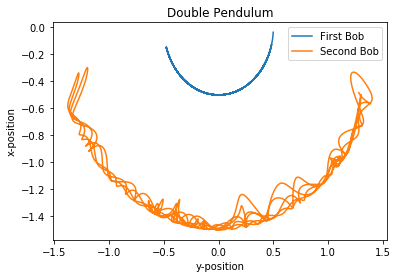

In [211]:
x1points = x1np(thetas1_lf, omegas1_lf, thetas2_lf, omegas2_lf, times)
y1points = y1np(thetas1_lf, omegas1_lf, thetas2_lf, omegas2_lf, times)
x2points = x2np(thetas1_lf, omegas1_lf, thetas2_lf, omegas2_lf, times)
y2points = y2np(thetas1_lf, omegas1_lf, thetas2_lf, omegas2_lf, times)

plt.plot(x1points, y1points, label='First Bob')
plt.plot(x2points, y2points, label='Second Bob')
plt.title("Double Pendulum")
plt.xlabel('y-position')
plt.ylabel('x-position')
plt.legend()
plt.show()

## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI) ... *no, it turns out that this is really hard.*

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.

In [385]:
## Problem 2
import numpy as np
import matplotlib.pyplot as plt

# Constants
M = 25 # grid squares per side (M has to be greater than 5 has to be such that a is a non-decimal)
rhopos = 1.0 # charge density at position lower left box
rhoneg = -1.0 # charge density at poistion upper right box
target = 1e-3  # target accuracy
a = 100/M # cm span between each grid point

# arrays
rho = np.zeros([M+1,M+1],float) # initialize
phi = np.zeros([M+1,M+1],float) # initialize

rho[1:(2+(20/a)), 1:(2+(20/a))] = rhoneg 
rho[(M-(1+(20/a))):M , (M-(1+(20/a))):M] = rhopos # negative and positive charge density matrix
                                                  # (scaled so that the charge density still corresponds to the 100 cm dimensions given above)

phiprime = np.zeros([M+1, M+1],float) # container for new values

# Main Loop
delta = 1.0
while delta > target:
    # calculate new values of the potential

    for i in range(M+1):
        for j in range(M+1):

            # if boundary
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (a**2 * rho[i,j])/4 + (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4.
    
    # NOTE: indentation is very important!
    # convergence check
    delta = np.max(np.abs(phi-phiprime))
            
    # swap arrays
    phi, phiprime = phiprime, phi

            
# print(phi)
print (phi)

C:\Users\JoshuaS\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\JoshuaS\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -1.88420190e+01  -2.96841178e+01  -3.56098161e+01
   -3.78695311e+01  -3.67681138e+01  -3.17688836e+01  -2.09104250e+01
   -1.44793120e+01  -1.03300714e+01  -7.50544635e+00  -5.51160034e+00
   -4.06626100e+00  -2.99701175e+00  -2.19396718e+00  -1.58494802e+00
   -1.12139895e+00  -7.69843526e-01  -5.06539801e-01  -3.13975954e-01
   -1.78563461e-01  -8.90717712e-02  -3.55978197e-02  -8.89851636e-03
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -2.96841178e+01  -4.82849403e+01  -5.88860695e+01
   -6.31007563e+

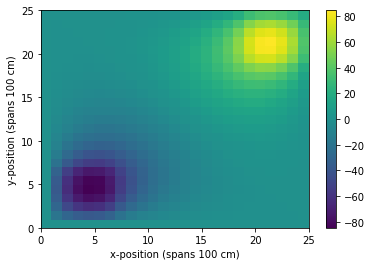

In [386]:
xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
plt.pcolormesh(xx,yy,phi)
plt.colorbar()
plt.xlabel("x-position (spans 100 cm)")
plt.ylabel("y-position (spans 100 cm)")
plt.show()